## 使うライブラリをインポートして，乱数のseedを固定

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


seed  = 11
np.random.seed(seed)

### フィッティングしたいデータセット$\boldsymbol{D}$を生成
$$\boldsymbol{D} = \{ (x_1^{(1)},x_2^{(1)}),(x_1^{(2)},x_2^{(2)}), \cdots , (x_1^{(N)}, x_2^{(N)})\}$$

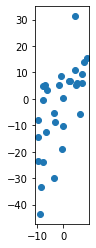

In [2]:
N = 30
x =  20 * (np.random.rand(N)) - 10
## y = a_1 * x + a_0 + gaussian noize
#x2 =  0.5 * x + 5 + np.random.normal(x， 10, N)
y = np.sin(x) + x + np.random.normal(x, 15, N)

# 2次元 * N個の観測データ
D = np.squeeze(np.dstack([x,y]))

plt.scatter(x,y)
plt.gca().set_aspect('equal')
plt.show()

## モデルのパラメータ$\boldsymbol{a}$を推定する準備（変数をおく）
$$ \boldsymbol{X} = \begin{pmatrix}
    (1, \boldsymbol{x_1}^T)\\
    (1, \boldsymbol{x_2}^T)\\
    \vdots \\
    (1, \boldsymbol{x_N}^T)
    \end{pmatrix}
$$
$$\boldsymbol{y} = \begin{pmatrix}
    y_1\\
    y_2\\
    \vdots \\
    y_N
    \end{pmatrix}
$$

In [3]:
# x(shape: (2, N), (1,x_i)を並べた行列)
ones = np.ones(N)
X = np.squeeze(np.dstack([ones, x]))

# y（shape: (N,1)）になるようにshapeを整える）
y_reshaped = y[:,np.newaxis]
print(y.shape)

(30,)


## モデルのパラメータ$\boldsymbol{a}$を推定する
$$\boldsymbol{a}
= \begin{pmatrix}a0\\a1\end{pmatrix}
= (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}$$

In [4]:
# @は内積の演算子， np.linalg.invは逆行列を計算してくれるライブラリ
a = (np.linalg.inv(X.T @ X) @ X.T) @ y_reshaped
print(a.shape)
print(a)

(2, 1)
[[-0.89567987]
 [ 1.72713229]]


## 推定したモデル$\hat{y}$を描画する

In [5]:
# (1, x_i)が縦に並ぶ行列Xnewをつくる
Nnew = 1000
x_new= np.linspace(start = -10, stop = 10, num = Nnew)
ones = np.ones(Nnew)
Xnew = np.squeeze(np.dstack([ones,x_new]))
print(Xnew.shape)

Yhat = Xnew @ a
print(Yhat.shape)

(1000, 2)
(1000, 1)


## 観測データの分布上に学習したモデルをプロットする

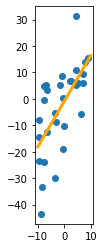

In [6]:
plt.scatter(x,y)
plt.plot(x_new,Yhat, linewidth=3,color='orange')
plt.gca().set_aspect('equal')
plt.show()